In [150]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

In [151]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\dataset.csv")
df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [152]:
x = df[['x']].values
y = df.y.values
n=2
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75, random_state=n)

In [153]:
maxdeg =10
train_error, val_error, crossval_error = [],[],[]
R2_train, R2_val = [],[]
dg = pd.DataFrame(columns=["R2 train", "R2 Validation", "Train MSE", "Validation MSE", "Cross Validation MSE"])

for deg in range(maxdeg):
    poly = PolynomialFeatures(degree= deg)
    x_poly = poly.fit_transform(x)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_val = poly.fit_transform(x_val)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(x_poly_train,y_train)
    
    # Predicted y values
    y_pred_train = lreg.predict(x_poly_train)
    y_pred_val = lreg.predict(x_poly_val)
    
    # R2 Score
    r2_train = lreg.score(x_poly_train, y_train)
    r2_val = lreg.score(x_poly_val, y_val)
    R2_train.append(r2_train)
    R2_val.append(r2_val)

    # MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)
    train_error.append(mse_train)
    val_error.append(mse_val)

    # Cross-Validation
    mse_score = cross_validate(estimator=lreg,X=x_poly, y=y, scoring="neg_mean_squared_error",cv=10, return_train_score=True)
    mse = -1*mse_score["test_score"].mean()
    crossval_error.append(mse)
# crossval_error
    dg.loc[deg] = [round(r2_train,4), round(r2_val,4), round(mse_train,4), round(mse_val,4), float(f'{mse:2.2f}')]
dg

,R2 train,R2 Validation,Train MSE,Validation MSE,Cross Validation MSE
0,0.0000,-0.1689,44.1660,19.3329,43.36
1,0.4783,0.5516,23.0397,7.4166,29.46
2,0.6989,0.1406,13.2969,14.2145,17.22
3,0.7666,-0.0524,10.3089,17.4063,58.40
4,0.7669,-0.1042,10.2955,18.2624,172.64
5,0.8045,-0.3520,8.6355,22.3615,3212.50
6,0.8075,-0.3804,8.5038,22.8306,13680.46
7,0.8358,-0.2615,7.2515,20.8647,180.59
8,0.8553,-1.0102,6.3923,33.2471,90033.57
9,0.8559,-1.2929,6.3627,37.9228,169785.71


## Finding the best degree

In [154]:
min_Val_degree = dg["Validation MSE"].idxmin()
min_CV_degree = dg["Cross Validation MSE"].idxmin()
print(min_Val_degree)
print(min_CV_degree)

1
2


In [155]:
min_mse = min(val_error)
best_degree = val_error.index(min_mse)

min_crossval_mse = min(crossval_error)
best_crossval_degree = crossval_error.index(min_crossval_mse)

# Print the values
print("The best degree of the model using validation is", best_degree)
print("The best degree of the model using cross-validation is", best_crossval_degree)


The best degree of the model using validation is 1
The best degree of the model using cross-validation is 2


## Plotting the error graph

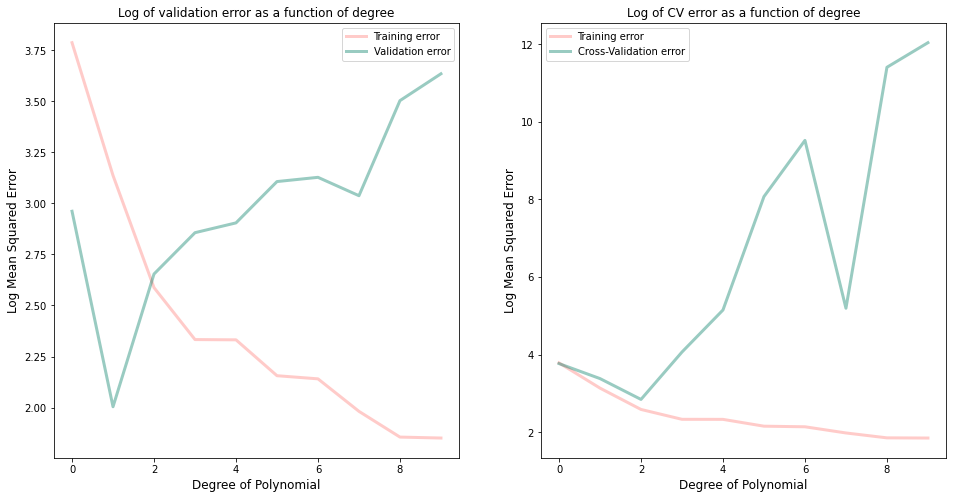

In [156]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(train_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(val_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(train_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(crossval_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show()

If you run the exercise with a random state of 0, do you notice any change? What conclusion can you draw from this experiment?

validation error changess but cross validation error remains the same

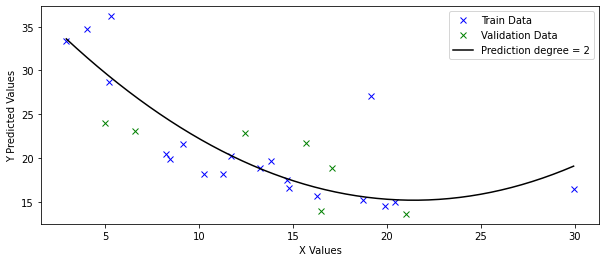

In [157]:
x1=np.linspace(x.min(),x.max()).reshape(-1,1)
poly = PolynomialFeatures(degree=best_crossval_degree)
x_poly_train = poly.fit_transform(x_train)
x1_poly = poly.fit_transform(x1)
lreg = LinearRegression().fit(x_poly_train, y_train)
y1 = lreg.predict(x1_poly)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_train,y_train,'bx', label="Train Data")
ax.plot(x_val,y_val,'gx', label="Validation Data")
ax.plot(x1, y1, 'k-', label=f"Prediction degree = {best_crossval_degree}")
ax.set_xlabel("X Values")
ax.set_ylabel("Y Predicted Values")
ax.legend()
plt.show()